<a href="https://colab.research.google.com/github/Harshal-Ug/Plant-Disease-Classification_AICTE_INTERSNSHIP-WEEK-1/blob/main/internpro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.70G/2.70G [00:24<00:00, 117MB/s]

Extracting files...


Importing necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import glob as gb
import os
import cv2

In [3]:
train = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

In [4]:
size = 224
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 90,
    width_shift_range = 0.0,
    height_shift_range = 0.0,
    shear_range = 0.0,
    zoom_range = 0.0,
    horizontal_flip = True,
    vertical_flip = True,
    rescale = 1./255,
    preprocessing_function = None,
    validation_split = 0.1
).flow_from_directory(
    train,
    target_size = (size, size),
    batch_size = 164,
    class_mode = 'categorical',
    color_mode = 'rgb',
    subset = 'training',
    shuffle = True
)

Found 63282 images belonging to 38 classes.


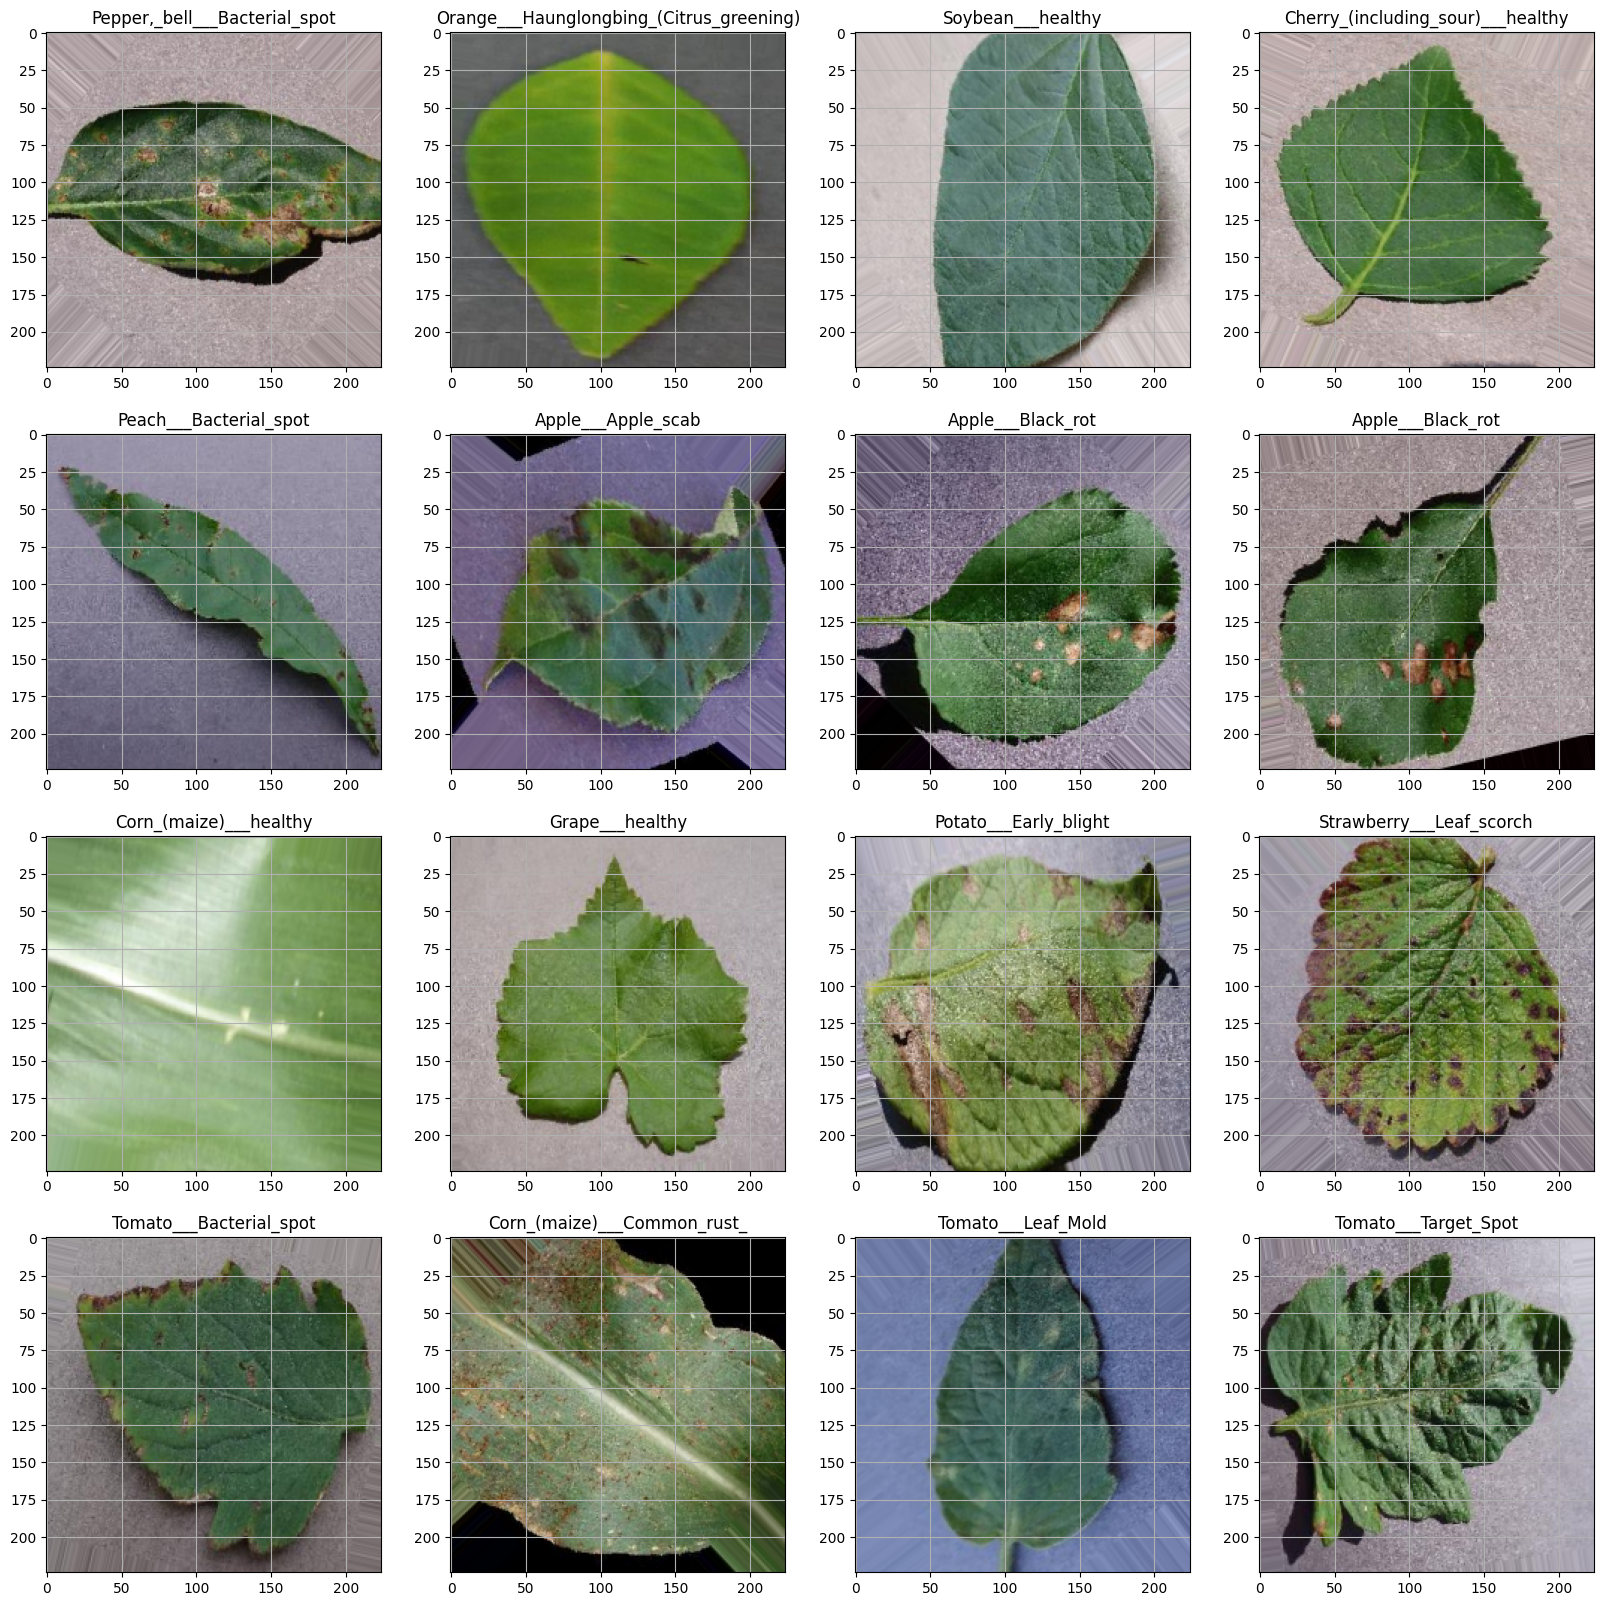

In [5]:
# Display some images
classes = list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for x_batch, y_batch in train_generator:
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(x_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
        plt.grid(None)
    plt.show()
    break

In [6]:
valid = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'


In [7]:
valid_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    preprocessing_function = None,
    validation_split = 0.1
).flow_from_directory(valid,
                      batch_size = 164,
                      target_size = (size, size),
                      class_mode = 'categorical',
                      color_mode = 'rgb',
                      subset = 'validation',
                      shuffle = False
)


Found 1742 images belonging to 38 classes.


In [8]:
test ='/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255.0,
    preprocessing_function = None,
).flow_from_directory(test,
                      batch_size = 164,
                      target_size = (size, size),
                      class_mode = 'categorical',
                      color_mode = 'rgb',
                      shuffle = False)

Found 17572 images belonging to 38 classes.


In [9]:
test_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [3]:
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32, kernel_size = 7, strides = 1, padding = 'same',
                              activation = 'relu', name = "conv1", input_shape =(224,224,3)))
model.add(keras.layers.MaxPool2D(pool_size = 2, name = "pool1"))
model.add(keras.layers.Conv2D(filters = 64, kernel_size = 5, strides = 1, padding = 'same',
                              activation = 'relu', name = "conv2"))
model.add(keras.layers.MaxPool2D(pool_size = 2, name = "pool2"))
model.add(keras.layers.Conv2D(filters = 128, kernel_size = 3, strides = 1, padding = 'same',
                              activation = 'relu', name = "conv3"))
model.add(keras.layers.MaxPool2D(pool_size = 2, name = "pool3"))

model.add(keras.layers.Conv2D(filters = 256, kernel_size = 5, strides = 1, padding = 'same',
                              activation = 'relu', name = "conv4"))
model.add(keras.layers.Flatten(name = 'Flatten1'))

model.add(keras.layers.Dense(128, activation = 'relu', name = 'Dense1'))
tf.keras.layers.Dropout(0.5)

model.add(keras.layers.Dense(64, activation = 'relu', name = 'Dense2'))
tf.keras.layers.Dropout(0.5)

model.add(keras.layers.Dense(38, activation = 'softmax', name = 'Output'))
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NameError: name 'tf' is not defined

In [19]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, min_lr=0.000001)

callbacks = [early_stopping, model_checkpoint, reduce_lr]


In [24]:
model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics = ['accuracy','precision','recall'] )

In [2]:
history = model.fit(train_generator, epochs = 25, validation_data = valid_generator, callbacks = callbacks)

NameError: name 'model' is not defined

In [26]:
import seaborn as sns

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
precision = history.history['precision']
val_precision = history.history['val_precision']
loss = history.history['loss']
val_loss = history.history['val_loss']
recall = history.history['recall']
val_recall = history.history['val_recall']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.show()


NameError: name 'history' is not defined

In [ ]:
plt.plot(epochs, acc, color = 'green', label = 'Training Accuracy')
plt.plot(epochs, val_acc, color = 'blue', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model_evaluate = model.evaluatre(test_generator)
print("loss : ", model_evaluate[0])
print("accuracy : ", model_evaluate[1])
print("precision : ", model_evaluate[2])
print("recall : ", model_evaluate[3])

In [ ]:
model.save('cnn_model.h5')